In [4]:
## Changing current working directory

In [5]:
import os
os.chdir(r'C:\Users\praka\OneDrive\Desktop\METRO\PYTHON_PROJECT\PROJECTS')
os.getcwd()

'C:\\Users\\praka\\OneDrive\\Desktop\\METRO\\PYTHON_PROJECT\\PROJECTS'

In [6]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [7]:
df= pd.read_csv('cinematicket.csv')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [9]:
# counting missing values
df.apply(lambda x: sum(x.isnull()))

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [10]:
df.fillna(
            {
                'occu_perc': df.occu_perc.mean(),
                'capacity': df.capacity.mean()
            }, 
            inplace = True
            )
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


<AxesSubplot:>

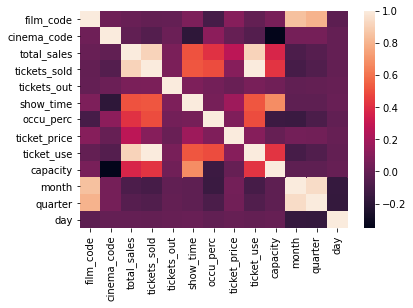

In [11]:
#Correlation in the X DataFrame
sns.heatmap(df.corr())

In [12]:
#extract dependent and independent variables
X = df.drop(['total_sales','date'],axis=1)
y = df.total_sales

In [13]:
X.head()

,film_code,cinema_code,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,1492,304,26,0,4,4.26,150000.0,26,610.328638,5,2,5
1,1492,352,42,0,5,8.08,80000.0,42,519.801980,5,2,5
2,1492,489,32,0,4,20.00,80000.0,32,160.000000,5,2,5
3,1492,429,12,0,1,11.01,100000.0,12,108.991826,5,2,5
4,1492,524,15,0,3,16.67,80000.0,15,89.982004,5,2,5


In [14]:
y.head()

0    3900000
1    3360000
2    2560000
3    1200000
4    1200000
Name: total_sales, dtype: int64

<AxesSubplot:>

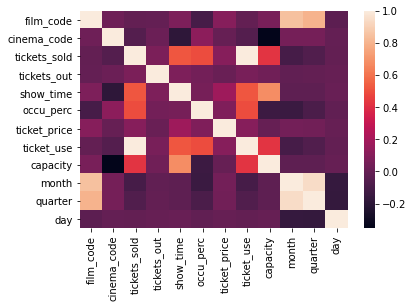

In [15]:
sns.heatmap(X.corr())

In [16]:

X = X.drop(['show_time','occu_perc'],axis=1)


In [18]:
#CONCLUSION : We are dropping the variables that correlated

In [19]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.072e+05
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:16:49   Log-Likelihood:            -2.5130e+06
No. Observations:              142524   AIC:                         5.026e+06
Df Residuals:                  142514   BIC:                         5.026e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.91e+07   2.27e+06      8.416   

<AxesSubplot:>

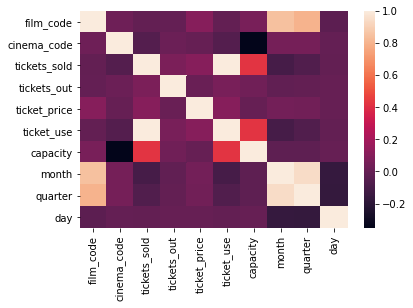

In [18]:
sns.heatmap(X.corr())

In [20]:
#Dropping the variables that are correlated
X = X.drop(['month','quarter'],axis=1)

In [21]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.371e+05
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:17:32   Log-Likelihood:            -2.5133e+06
No. Observations:              142524   AIC:                         5.027e+06
Df Residuals:                  142516   BIC:                         5.027e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.047e+07   1.23e+06     -8.493   

<AxesSubplot:>

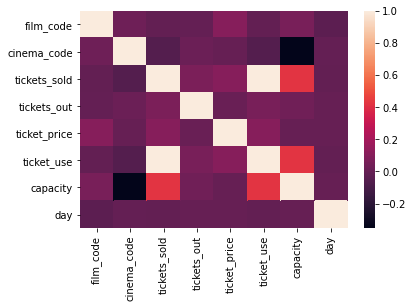

In [22]:
sns.heatmap(X.corr())

In [23]:
#extract dependent and independent variables
X = X.drop(['ticket_use'],axis=1)

In [23]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.371e+05
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:52:23   Log-Likelihood:            -2.5133e+06
No. Observations:              142524   AIC:                         5.027e+06
Df Residuals:                  142516   BIC:                         5.027e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.047e+07   1.23e+06     -8.493   

In [24]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.600e+05
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:52:23   Log-Likelihood:            -2.5133e+06
No. Observations:              142524   AIC:                         5.027e+06
Df Residuals:                  142517   BIC:                         5.027e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.047e+07   1.23e+06     -8.493   

<AxesSubplot:>

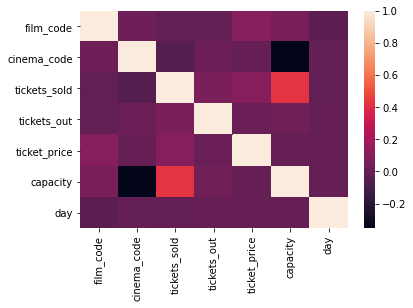

In [25]:
sns.heatmap(X.corr())

In [24]:
#Dropping the variables that are correlated
X = X.drop(['capacity'],axis=1)

In [25]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.599e+05
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:27:16   Log-Likelihood:            -2.5133e+06
No. Observations:              142524   AIC:                         5.027e+06
Df Residuals:                  142517   BIC:                         5.027e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.091e+07   1.23e+06     -8.858   

In [26]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.919e+05
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:27:23   Log-Likelihood:            -2.5133e+06
No. Observations:              142524   AIC:                         5.027e+06
Df Residuals:                  142518   BIC:                         5.027e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.091e+07   1.23e+06     -8.858   

<AxesSubplot:>

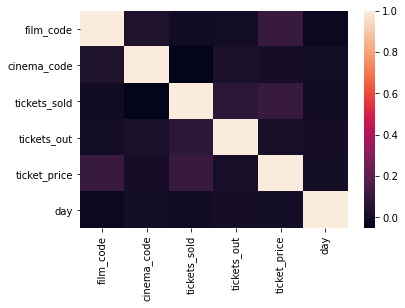

In [29]:
sns.heatmap(X.corr())

In [27]:
#CONCLUSION : Even after backeard featureelimination the multicollinearity still exists, 
#but the adjusted R2 is giving good accuracy so we can proceed with linear regression.

## LINEAR REGRESSION

In [28]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=5).mean()


0.8367127481889403

In [29]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [30]:
model.intercept_

-10906274.037219303

In [31]:
model.coef_

array([-4175.22995921,  6639.30996735, 98445.99988476, -2761.64948756,
         165.75596284, 12916.80118037])

In [32]:
#split to train and test for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
#scale the features using training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
model.score(X_train,y_train)

0.8708863416905965

In [36]:
#To retrieve the intercept:
print(model.intercept_)

#For retrieving the slope:
print(model.coef_)

-11054495.363444237
[-4215.17744393  6893.26309198 98924.26018762 14913.88125128
   166.6243035  11309.4870086 ]


In [37]:
y_pred = model.predict(X_test)
y_pred

array([-2790528.49629184, 11810276.09257513, 20201913.59934232, ...,
         682839.55865353,  -860094.4098871 , 18405036.82540344])

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4958643.51591346
Mean Squared Error: 109040727610805.11
Root Mean Squared Error: 10442256.825552851


In [45]:
lr = LinearRegression()
cv_lr = cross_val_score(estimator = lr, X = X, y = y, cv = 4)

y_pred_lr_train = model.predict(X_train)
r2_score_lr_train = r2_score(y_train, y_pred_lr_train)

y_pred_lr_test = model.predict(X_test)
r2_score_lr_test = r2_score(y_test, y_pred_lr_test)

rmse_lr = (np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_lr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_lr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_lr_test))
print('RMSE : {0:.3f}'.format(rmse_lr))

CV Linear Regression : 0.824
R2_score (train) : 0.871
R2_score (test) : 0.870
RMSE : 10442256.826


In [40]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
115677,1800000,-2.790528e+06
30581,6720000,1.181028e+07
20436,13800000,2.020191e+07
134415,15920000,1.696685e+07
80751,150000,-5.481340e+06
...,...,...
87730,2240000,2.124791e+06
7309,640000,-5.895948e+05
44951,3600000,6.828396e+05
2442,840000,-8.600944e+05


## KNN

In [41]:
#import the knn model
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor()
kr.fit(X,y)

KNeighborsRegressor()

In [42]:
#see the cross_validated score for cv=3
from sklearn.model_selection import cross_val_score
cross_val_score(kr,X,y,cv=4).mean()

0.9699278979792252

In [43]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    kr = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(kr,X,y,cv=4).mean())
print(scores)

[0.9723077877612087, 0.9723359629274951, 0.9726230077476157, 0.9716971877503955, 0.9699278979792252, 0.9682237404552212, 0.9661985736122027, 0.9641826170928279, 0.9616688095603748, 0.9602178100251771]


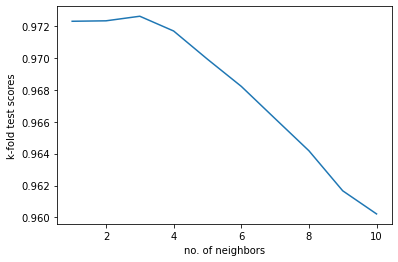

In [44]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

In [47]:

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [48]:
params = {
            'n_neighbors': [3,4,5,6,7,8],
            'weights':['uniform', 'distance'],
            'metric' :['euclidean','manhattan']
        }
model = GridSearchCV(KNeighborsRegressor(), params,cv=4)
model.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']})

In [49]:
model.best_score_

0.9874338911779444

In [50]:
model.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [51]:
best_model = model.best_estimator_

In [52]:
best_model.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3, weights='distance')

In [53]:
y_pred = best_model.predict(X_test)

In [54]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
115677,1800000,7.615191e+05
30581,6720000,9.573554e+06
20436,13800000,1.370318e+07
134415,15920000,1.586205e+07
80751,150000,2.176943e+05
...,...,...
21699,1920000,2.001573e+06
121537,6400000,6.518505e+06
123976,6120000,5.653550e+06
88576,9030000,9.037688e+06


In [47]:
kr = KNeighborsRegressor()
cv_kr = cross_val_score(estimator = kr, X = X, y = y, cv = 4)

y_pred_kr_train = model.predict(X_train)
r2_score_kr_train = r2_score(y_train, y_pred_kr_train)

y_pred_kr_test = model.predict(X_test)
r2_score_kr_test = r2_score(y_test, y_pred_kr_test)

rmse_knn = (np.sqrt(mean_squared_error(y_test, y_pred_kr_test)))

print('CV Knn Regression : {0:.3f}'.format(cv_kr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_kr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_kr_test))
print('RMSE : {0:.3f}'.format(rmse_knn))

CV Knn Regression : 0.970
R2_score (train) : 0.871
R2_score (test) : 0.870
RMSE : 10442256.826


## DECISION TREE

In [48]:
dtr = DecisionTreeRegressor()
cross_val_score(DecisionTreeRegressor(),X,y,cv=4).mean()

0.9921540338656154

In [49]:
#hyper-parameter tuning on DecisionTree's max-depth
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1,15,1):
    model = DecisionTreeRegressor(max_depth=i,random_state=0)
    kfold_score = cross_val_score(model, X, y, cv = 5).mean()
    scores.append(kfold_score)

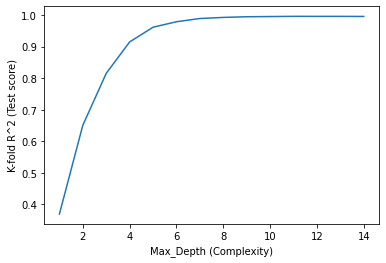

In [50]:
#plot k-fold scores vs max_depth values
import matplotlib.pyplot as plt
plt.plot(range(1,15,1),scores)
plt.xlabel('Max_Depth (Complexity)')
plt.ylabel('K-fold R^2 (Test score)')
plt.show()

In [51]:
model = DecisionTreeRegressor(max_depth=7)
model.fit(X,y)

DecisionTreeRegressor(max_depth=7)

[Text(167.4, 181.2, 'tickets_sold <= 774.5\nmse = 939713743322662.5\nsamples = 142524\nvalue = 12347275.408'),
 Text(83.7, 108.72, 'tickets_sold <= 238.5\nmse = 186012826019202.06\nsamples = 138403\nvalue = 8747564.367'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'tickets_sold <= 2650.5\nmse = 1.120167779939483e+16\nsamples = 4121\nvalue = 133242885.006'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

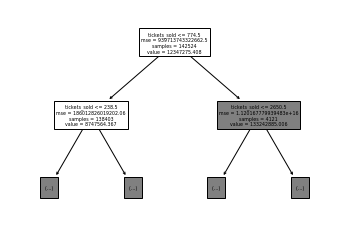

In [52]:
from sklearn.tree import plot_tree
plot_tree(model,feature_names=X.columns,max_depth=1)

In [53]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
params = {
            'max_depth': [6,7,8,9,10],
            'min_samples_split' : [1.0,2.0,3.0],
            'min_samples_leaf' :[0.5,1]
        }
model = GridSearchCV(DecisionTreeRegressor(), params,cv=4)
model.fit(X,y)

C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the float 2.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the float 2.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the float 2.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the float 2.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the float 2.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [1.0, 2.0, 3.0]})

In [55]:
model.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 1.0}

In [56]:
model.best_score_

0.33334695176190837

In [57]:
best_model = model.best_estimator_

In [58]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [59]:
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=1.0)

In [60]:
y_pred = best_model.predict(X_test)

In [61]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
115677,1800000,8.745007e+06
30581,6720000,8.745007e+06
20436,13800000,8.745007e+06
134415,15920000,8.745007e+06
80751,150000,8.745007e+06
...,...,...
21699,1920000,8.745007e+06
121537,6400000,8.745007e+06
123976,6120000,8.745007e+06
88576,9030000,8.745007e+06


In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10282993.447618674
Mean Squared Error: 450977731444709.9
Root Mean Squared Error: 21236236.282465637


In [65]:
cv_dt_reg = cross_val_score(estimator = dtr, X = X, y = y, cv = 4)

y_pred_dt_reg_train = best_model.predict(X_train)
r2_score_dt_reg_train = r2_score(y_train, y_pred_dt_reg_train)

y_pred_dt_reg_test = best_model.predict(X_test)
r2_score_dt_reg_test = r2_score(y_test, y_pred_dt_reg_test)

rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_dt_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_dt_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_dt_reg_test))
print('RMSE : {0:.3f}'.format(rmse_dt))

CV Linear Regression : 0.993
R2_score (train) : 0.461
R2_score (test) : 0.470
RMSE : 21236236.282


## RANDOM FOREST

In [69]:
rfr = RandomForestRegressor()
cross_val_score(RandomForestRegressor(),X,y,cv=4).mean()

0.9957679153001575

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [71]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=9),
                                  X,y,cv=4).mean())

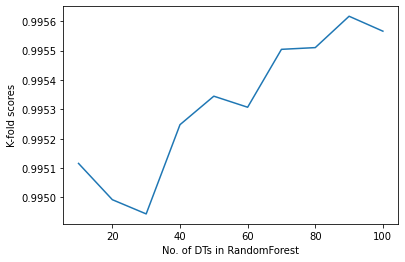

In [72]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [73]:
params = {
            'n_estimators': [100,110,120,130],
            'max_depth': [16,17,18,19,20,21,22,23]
        }
model = GridSearchCV(RandomForestRegressor(), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [16, 17, 18, 19, 20, 21, 22, 23],
                         'n_estimators': [100, 110, 120, 130]})

In [74]:
model.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [75]:
model.best_score_

0.9960522278701951

In [76]:
best_model = model.best_estimator_

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [78]:
best_model.score(X_test,y_test)

0.9999712057614916

In [79]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [80]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [81]:
y_pred = best_model.predict(X_test)

In [82]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
115677,1800000,1787700.0
30581,6720000,6704700.0
20436,13800000,13800000.0
134415,15920000,15920000.0
80751,150000,150000.0
...,...,...
21699,1920000,1920000.0
121537,6400000,6399200.0
123976,6120000,6120000.0
88576,9030000,9030000.0


In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 59334.97844353423
Mean Squared Error: 1616605075170.9155
Root Mean Squared Error: 1271457.8542645115


In [85]:
rfr = RandomForestRegressor()
cv_rf_reg = cross_val_score(estimator = rfr, X = X, y = y, cv = 4)

y_pred_rf_reg_train = best_model.predict(X_train)
r2_score_rf_reg_train = r2_score(y_train, y_pred_rf_reg_train)

y_pred_rf_reg_test = best_model.predict(X_test)
r2_score_rf_reg_test = r2_score(y_test, y_pred_rf_reg_test)

rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_rf_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_rf_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_rf_reg_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV Linear Regression : 0.995
R2_score (train) : 1.000
R2_score (test) : 0.998
RMSE : 1271457.854


## ADA BOOST 

In [86]:
adr = AdaBoostRegressor()
adr.fit(X,y)

AdaBoostRegressor()

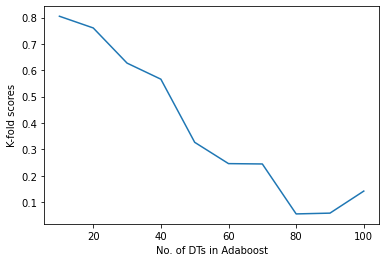

In [87]:
from sklearn.ensemble import AdaBoostRegressor

#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=0),
                                  X,y,cv=4).mean())
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [88]:
adr = AdaBoostRegressor(n_estimators=25,random_state=0)
cross_val_score(AdaBoostRegressor(n_estimators=25,random_state=0),
                                  X,y,cv=4).mean()

0.7703769303078148

In [89]:
from sklearn.tree import DecisionTreeRegressor
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [20,30,70,80,90,100],
            'base_estimator': [DecisionTreeRegressor(max_depth=15,random_state=0),
                               DecisionTreeRegressor(max_depth=20,random_state=0),
                               DecisionTreeRegressor(max_depth=25,random_state=0),
                               DecisionTreeRegressor(max_depth=30,random_state=0)],
            'learning_rate': [0.1,0.001,0.5]
        }
model = GridSearchCV(AdaBoostRegressor(random_state=0), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=15,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=20,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=25,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=30,
                                                                  random_state=0)],
                         'learning_rate': [0.1, 0.001, 0.5],
                         'n_estimators': [20, 30, 70, 80, 90, 100]})

In [90]:
model.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=25, random_state=0),
 'learning_rate': 0.5,
 'n_estimators': 30}

In [91]:
model.best_score_

0.9975259580836886

In [92]:
best_model = model.best_estimator_

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [94]:
best_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=25,
                                                       random_state=0),
                  learning_rate=0.5, n_estimators=30, random_state=0)

In [95]:
y_pred = best_model.predict(X_test)

In [96]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
46161,760000,760000.0
139577,1925000,1960000.0
80978,2080000,2080000.0
23061,320000,320000.0
114391,1890000,1890000.0
...,...,...
70548,5900000,5900000.0
136463,4350000,4350000.0
6712,560000,560000.0
42767,2560000,2560000.0


In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 74280.02292947152
Mean Squared Error: 604947301470.1539
Root Mean Squared Error: 777783.5826694685


In [98]:
cv_ad_reg = cross_val_score(estimator = adr, X = X, y = y, cv = 4)
y_pred_ad_reg_train = best_model.predict(X_train)
r2_score_ad_reg_train = r2_score(y_train, y_pred_ad_reg_train)

y_pred_ad_reg_test = best_model.predict(X_test)
r2_score_ad_reg_test = r2_score(y_test, y_pred_ad_reg_test)

rmse_ad = (np.sqrt(mean_squared_error(y_test, y_pred_ad_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_ad_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_ad_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_ad_reg_test))
print('RMSE : {0:.3f}'.format(rmse_ad))

CV Linear Regression : 0.770
R2_score (train) : 1.000
R2_score (test) : 0.999
RMSE : 777783.583


## CONCLUSION : 


In [ ]:
#Amongst all the methods Random forest gave the best accuracy score followed by KNN and Linear Regression.

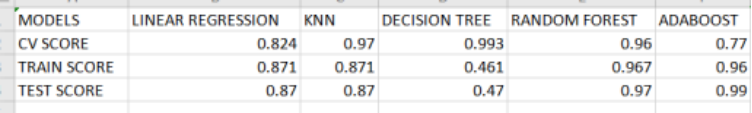